## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
main_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID')

# Display the data table for preview
main_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
main_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = main_df[main_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
main_df = main_df[main_df['Mouse ID'] != 'g989']

# Checking the number of mice in the clean DataFrame.
main_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [8]:
drug_list = main_df['Drug Regimen'].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = main_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_stats_df = drug_group[['Tumor Volume (mm3)']].mean()
drug_stats_df = drug_stats_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume Mean'})
drug_stats_df['Tumor Volume Median'] = drug_group[['Tumor Volume (mm3)']].median()
drug_stats_df['Tumor Volume Variance'] = drug_group[['Tumor Volume (mm3)']].var()
drug_stats_df['Tumor Volume SD'] = drug_group[['Tumor Volume (mm3)']].std()
drug_stats_df['Tumor Volume SEM'] = drug_group[['Tumor Volume (mm3)']].sem()

# Assemble the resulting series into a single summary dataframe.
drug_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_df2 = main_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_stats_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [12]:
# Find number of measurements per drug regimen
measurements = main_df['Drug Regimen'].value_counts()
measurements_df = measurements.to_frame()
measurements_df
measurements_df.reset_index(level=0, inplace=True)
measurements_df

,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


Text(0, 0.5, 'Number of Measurements')

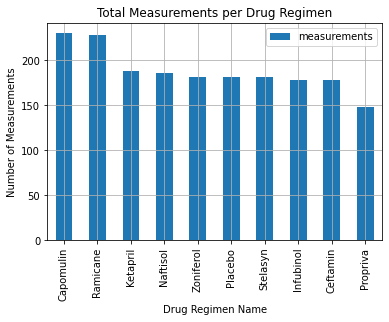

In [13]:
# Set tick marks
x_axis = np.arange(len(measurements))
tick_locations = [value for value in x_axis]

# Create bar chart using pandas with proper readability and labels
plot_df = pd.DataFrame({'measurements': measurements}, index=measurements_df['index'])
bar = plot_df.plot.bar(rot=90, title="Total Measurements per Drug Regimen", grid=True)
bar.set_xlabel("Drug Regimen Name")
bar.set_ylabel("Number of Measurements")

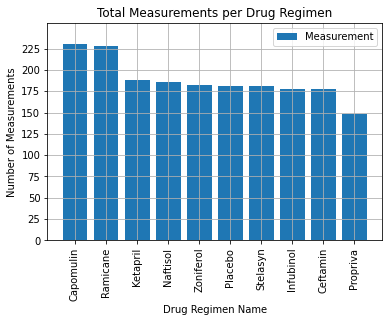

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create bar chart using pyplot
plt.bar(x_axis, measurements, align='center', label='Measurement')

# Add grid, ticks, tick frequency, and set height for legibility
plt.xticks(tick_locations, measurements_df['index'], rotation='vertical')
plt.ylim(0, max(measurements)+25)
plt.yticks(np.arange(0, max(measurements), 25))
plt.grid(zorder=0)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen Name")
plt.ylabel("Number of Measurements")

# Add legend
plt.legend(loc='upper right')

# Show graph
plt.show()

<AxesSubplot:title={'center':'Sex Breakdown of Mice'}>

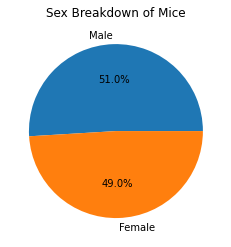

In [15]:
# Calculat the number of males and females and store in a series
Sexes = main_df['Sex'].value_counts()

# Get labels for the pie charts, below
Labels = Sexes.index.values.tolist()

# Generate a pie plot showing the distribution of female versus male mice using pandas
Sexes.plot.pie(label="", title="Sex Breakdown of Mice", autopct="%1.1f%%")

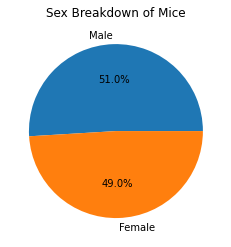

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Sexes.tolist(), labels = Labels, autopct="%1.1f%%") 
plt.title("Sex Breakdown of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = main_df.groupby('Mouse ID')
max_timepoint_df = mouse_group[['Timepoint']].max()
max_timepoint_df.reset_index(level=0, inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = max_timepoint_df.merge(main_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_df = max_timepoint_df[['Mouse ID', 'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
data_to_plot = []
outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in four_treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    current_treatment_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment]
    treatment_data_list = current_treatment_df['Tumor Volume (mm3)'].tolist()
    
    # add subset 
    data_to_plot.append(treatment_data_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = current_treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    outlier_top_lim = upperq + (1.5 * (iqr))
    outlier_bottom_lim = lowerq - (1.5 * (iqr))
    outlier_df = current_treatment_df.loc[(current_treatment_df['Tumor Volume (mm3)'] < outlier_bottom_lim) | (current_treatment_df['Tumor Volume (mm3)'] < outlier_bottom_lim)]
    
    # Display outliers
    if outlier_df.empty:
        continue
    else:
        print(outlier_df)

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
31     c326    Infubinol          5           36.321346


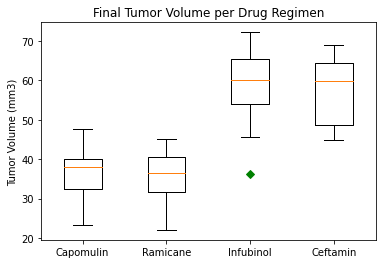

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data_to_plot, 0, 'gD')
ax.set_xticklabels(four_treatments)
plt.show()

## Line and Scatter Plots

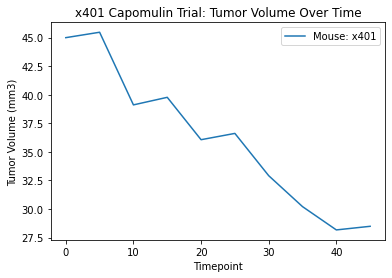

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401_df = main_df.loc[main_df['Mouse ID'] == 'x401']
Timepoints = x401_df['Timepoint'].tolist()

Tumor_Volume = x401_df['Tumor Volume (mm3)'].tolist()
plt.plot(Timepoints, Tumor_Volume, label = 'Mouse: x401')

plt.title("x401 Capomulin Trial: Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

plt.show()

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
